In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df=pd.read_csv('Metazygia monitor 1.csv')
#meta=pd.DataFrame(index=df.columns[2:])
#meta['Entrained']=''
#meta['TOD']=''
#meta.to_csv('META-Metazygia monitor 1.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
meta=pd.read_csv('META-Metazygia monitor 1.csv')
def setindex(df):
    df['Date_Time']=pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df = df.set_index(pd.DatetimeIndex(df['Date_Time']))
    df = df.drop(['Date', 'Time'], axis = 1)
    return df


In [3]:
df=pd.read_csv('Metazygia monitor 1-test.csv', index_col=0)
dfdark=df.iloc[7200:]
dflight=df.iloc[:7200]


In [4]:
import math 
df1=df.copy()
columns=df1.columns[1:-1]

In [5]:
#df.to_csv('Metazygia monitor 1-test.csv')


In [6]:
#Anaconda prompt "pip install CosinorPy"
#https://github.com/mmoskon/CosinorPy/blob/master/docs/docs_cosinor.md#parameters-6
from CosinorPy import cosinor, cosinor1

ModuleNotFoundError: No module named 'CosinorPy'

In [7]:
dfcos=dfdark.loc[:,['lights','Monitor 1 Spider 21']]
dfcos['test']='Spider'
dfcos['real']=dfdark['Monitor 1 Spider 21']
dfcos['y']=dfcos['real'].rolling(window=60).mean()
dfcos['x']=range(0,len(dfcos.real))
#dfcos=dfcos.drop(columns=['lights', 'Monitor 1 Spider 21'])
dfcos=dfcos.dropna()


In [8]:
#from gatspy.periodic import periodogram_auto
from gatspy.periodic import LombScargleFast
    
time = range(len(dfcos.x))
##Use rolling average to find period:
#move = dfcos['y'].values
##Use real data to find period:
move = dfcos['real'].values
model = LombScargleFast().fit(time, move,.1)
periods, power = model.periodogram_auto()
eightteen_hours=18*60
thirtysix_hours=36*60
#Estimated periods will fall between 18 and thirty-six hours
model.optimizer.period_range = (eightteen_hours, thirtysix_hours)

period = model.best_period
#Record period in hours
periodh=(period/60)
display(periodh)

periods = np.linspace(0.3, 0.9, 10000)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scores = model.score(periods)
scores = model.score(time)

fig, ax = plt.subplots(figsize=(8, 3))
fig.subplots_adjust(bottom=0.2)
ax.plot(periods, time)
ax.set(xlabel='period (days)', ylabel='Lomb Scargle Power',
       xlim=(0.3, 0.9), ylim=(0, 1))

Finding optimal frequency:
 - Estimated peak width = 0.000487
 - Using 5 steps per peak; omega_step = 9.74e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


23.4505659645636

LinAlgError: Singular matrix

In [ ]:
from gatspy.periodic import LombScargleFast

periods, power = model.periodogram_auto(nyquist_factor=100)

fig, ax = plt.subplots()
ax.plot(periods, power)
ax.set(xlim=(0.2, 1.4), ylim=(0, 0.8),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power');

C:\ProgramData\Anaconda3\lib\site-packages\CosinorPy\cosinor.py:1098: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X,Y, 'ko', markersize=1, label = 'data', color=color)
C:\ProgramData\Anaconda3\lib\site-packages\CosinorPy\cosinor.py:1103: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X_plot, Y_plot, 'k', label = 'fit', color=color)


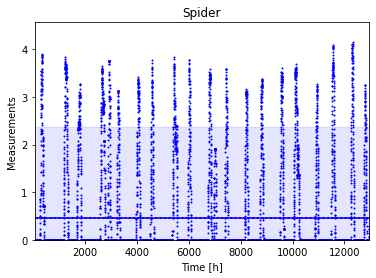

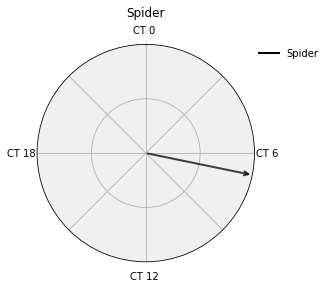

,test,period,n_components,p,q,p_reject,q_reject,RSS,R2,R2_adj,log-likelihood,amplitude,acrophase,mesor,peaks,heights,troughs,heights2,ME,resid_SE
0,Spider,24.0,2.0,0.99972,0.99972,1.0,1.0,12310.38939,0.000004,-0.000306,-18003.447485,0.002658,-1.773632,0.457469,[6.774774774774775],[0.46012750824996945],[18.354354354354353],[0.45481060521885325],1.915125,0.977031


In [40]:
cosinor.fit_group(dfcos, color='b')

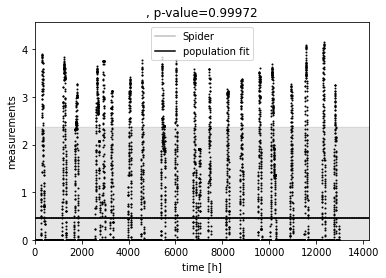

,test,period,n_components,p,q,p_reject,q_reject,RSS,amplitude,acrophase,mesor,ME,resid_SE
0,Spider,24.0,2.0,0.99972,0.99972,1.0,1.0,12310.38939,0.002658,-1.773632,0.457469,1.915125,0.977031


In [34]:
df_results = cosinor.population_fit_group(dfcos) 
df_best_models = cosinor.get_best_models_population(dfcos, df_results, n_components = [1,2,3])
display(df_best_models)

In [35]:
per=pd.DataFrame(index=columns)

In [36]:
period=np.empty(len(columns))
for i in range(len(columns)):
    time = range(len(dfdark.index))
    move = dfdark[columns[i]].values
    model = LombScargleFast().fit(time, move)
    #18-36 hours
    model.optimizer.period_range = (eightteen_hours, thirtysix_hours)
    period[i] = (model.best_period)/60
    
    


Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Finding optimal frequency:
 - Estimated peak width = 0.000485
 - Using 5 steps per peak; omega_step = 9.7e-05
 - User-specified period range:  1.1e+03 to 2.2e+03
 - Computing periods at 31 steps
Zooming-in on 5 can

In [41]:

per['Period']=period
display(per)

,Period
Monitor 1 Spider 1,21.946098
Monitor 1 Spider 2,21.305306
Monitor 1 Spider 3,24.450380
Monitor 1 Spider 4,24.662566
Monitor 1 Spider 5,21.326343
Monitor 1 Spider 6,22.180489
Monitor 1 Spider 7,18.762337
Monitor 1 Spider 8,23.220177
Monitor 1 Spider 9,23.787924
Monitor 1 Spider 10,22.904977
